<a href="https://colab.research.google.com/github/n-beckage/CS254_Final_Project/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [100]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS254/CS 254 Final Project/' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['nytcrosswords.csv', 'FeatureEngineering.ipynb']


# Features to Build
- Number of words in the clue
- Does clue contain pronoun?
- Weight letters in the clue by frequencey
  https://en.wikipedia.org/wiki/Letter_frequency
- Weights letter in answer by frequency 
- 

### Other tasks
- Figure out what day of the week each clue is from and filter the dataset to just be Sunday-Wednesday puzzle clues

### Labels
- Name of a person
- Too complicated without NLP (basically our 'other' category
- 



# Loading the Dataset
The dataset is located in our folder

In [101]:
df = pd.read_csv(GOOGLE_DRIVE_PATH+"nytcrosswords.csv", encoding="windows_1258")
df.head() #look at the first few rows

,Date,Word,Clue
0,10/31/2021,PAT,"Action done while saying ""Good dog"""
1,10/31/2021,RASCALS,Mischief-makers
2,10/31/2021,PEN,It might click for a writer
3,10/31/2021,SEP,Fall mo.
4,10/31/2021,ECO,Kind to Mother Nature


# Start of Feature Extraction + Engineering

---

HEY TEAM! Here's what I've done so far to code feature extraction, hope this is a good headstart! I also made an outline for next steps for reliminary results in text boxes below.
Message me with questions and lmk if you want to code more of it with me this weekend! 😀 - Anna Jane

In [102]:
# get given features from dataframe (feature extraction)
clues = np.asarray(df["Clue"], dtype=str)
answers = np.asarray(df["Word"], dtype=str)
# found an error:  when answer to a clue is "NULL" python replaces it with a NaN.
# here I find all instances where the answer was replaced with a NaN and restate 
# the answer to the clue as "NULL".
for i in np.argwhere(answers=="nan"):
    answers[i]="NULL"

dates = np.asarray(df["Date"])

In [220]:
# get day of the week from dates (getting targets/labels)
def get_days(dates):
    clue_days = []
    for i in range(len(dates)):
        month, day, year = (int(x) for x in dates[i].split('/'))   
        my_date = date(year, month, day)
        clue_days.append(my_date.strftime("%A"))  #'Wednesday'
    return np.array(clue_days)

# call function
clue_days = get_days(dates) 
# ^ ideally want to condense these to "puzzle_days" since each example we feed our classifier will be one puzzle

In [221]:
print(clue_days)

['Sunday' 'Sunday' 'Sunday' ... 'Sunday' 'Sunday' 'Sunday']


In [104]:
# (feature engineering)

# get clue lengths: number of characters (including punctuation) in clue
clue_lengths = np.empty(len(clues))
for i in range(len(clue_lengths)):
    clue_lengths[i] = len(clues[i])

# get answer lengths: number of characters (including punctuation) in answer
answer_lengths = np.empty(len(answers))
for i in range(len(answer_lengths)):
    answer_lengths[i] = len(answers[i])

## Making a list of puzzle objects

In [106]:
# puzzles: a list of all 10,207 puzzles. Each item in the list represents a puzzle. Each puzzle is a tuple in the format (dayOfWeek, clue-Answerpairs).
# Each clue-Answerpairs is a dictionary where the key is a list of clues, and the value is the corresponding (matching index) list of answers
# puzzles=[]
# for i in range(len(puzzle_groups)):
#   puz = puzzle_groups[i]
#   dayOfWeek = get_days(np.array(puz["Date"]))[0]
#   clueAnswerPair = dict(clues = list(puz["Clue"]), answers = list(puz["Word"]))
#   puzzles.append((dayOfWeek,clueAnswerPair))


In [107]:
# # HOW TO GET FIRST CLUE FROM FIRST PUZZLE
# list(puzzles[0][1].values())[0][0]

# # HOW TO GET FIRST ANSWER FROM FIRST PUZZLE
# list(puzzles[0][1].values())[1][0]

'STALK'

## Splitting the data into train/test data
Our simplest case model - simple SVM with 80% train 20% test

In [108]:
days = get_days(dates)
len(days)

781573

In [126]:
# putting the data into a nx3 arrray where n is the number of rows (781,573). Every time this cell is run the data is re-ordered
data_arr = np.empty((len(days),3), dtype=object)
for i in range(len(days)):
  data_arr[i][0] = clue_lengths[i]
  data_arr[i][1] = answer_lengths[i]
  data_arr[i][2] = days[i]

array([35.0, 3.0, 'Sunday'], dtype=object)

In [127]:
 # this is an inplace function to SHUFFLE DATA
np.random.shuffle(data_arr)

array([36.0, 4.0, 'Sunday'], dtype=object)

In [179]:
def get_subset(data_array, size):
  return data_array[:size]

# getting the subset of our data (non-random, takes n frist values of data_arr)
subset = get_subset(data_arr, 1000)

# Training an SVM Classifier
After feature extraction/engineering and splitting up data into features for each puzzle, train an SVM on a small set of examples.

- Create an <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a> object, imported from sklearn's svm module, use linear or poly kernel.
- Call the .fit() function on your model with x_train and y_train as parameters.
- Call the .predict() function on your model with x_test as a parameter and store the results.

In [205]:
# test_cell

# x_train, x_test, y_train, y_test = train_test_split(subset[:,0:2], subset[:,2], test_size = 0.20, random_state=0)
# supVect.fit(x_train, y_train)
# print(supVect.score(x_test,y_test))
# y_preds = supVect.predict(x_test)
# print(accuracy_score(y_test, y_preds))
# print(classification_report(y_test, y_preds))

In [191]:
# TAKES ~5 MINUTES TO RUN - BUILDING MODELS
supVect = SVC(kernel = 'rbf') # this is the default kernel
test_errors = []
train_errors = []
iters = range(1000, 11000, 500)
for i in iters:
  subset = get_subset(data_arr, i)
  x_train, x_test, y_train, y_test = train_test_split(subset[:,0:2], subset[:,2], test_size = 0.20, random_state=0)
  supVect.fit(x_train, y_train)
  y_test_preds = supVect.predict(x_test)
  test_score = accuracy_score(y_test, y_test_preds)
  test_error = 1 - test_score
  test_errors.append(test_error)
  y_train_preds = supVect.predict(x_train)
  train_score = accuracy_score(y_train, y_train_preds)
  train_error = 1 - train_score
  train_errors.append(train_error)

In [204]:
# report for the last classifier with 10,500 samples
print(classification_report(y_test, y_test_preds))
print(len(y_test)+len(y_train))
print(np.unique(y_test_preds))
len(y_test)

              precision    recall  f1-score   support

      Friday       0.00      0.00      0.00       200
      Monday       0.00      0.00      0.00       292
    Saturday       0.00      0.00      0.00       244
      Sunday       0.25      1.00      0.40       522
    Thursday       0.00      0.00      0.00       267
     Tuesday       0.00      0.00      0.00       277
   Wednesday       0.00      0.00      0.00       298

    accuracy                           0.25      2100
   macro avg       0.04      0.14      0.06      2100
weighted avg       0.06      0.25      0.10      2100

10500
['Sunday']


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2100

In [218]:
len(data_arr)

781573

In [224]:
# Counting the balance of our data
import collections
elements_count = collections.Counter(clue_days)
for key, value in elements_count.items():
   print(f"{key}: {value}")

Sunday: 185922
Saturday: 88194
Friday: 90534
Thursday: 100480
Wednesday: 103910
Tuesday: 105562
Monday: 106971


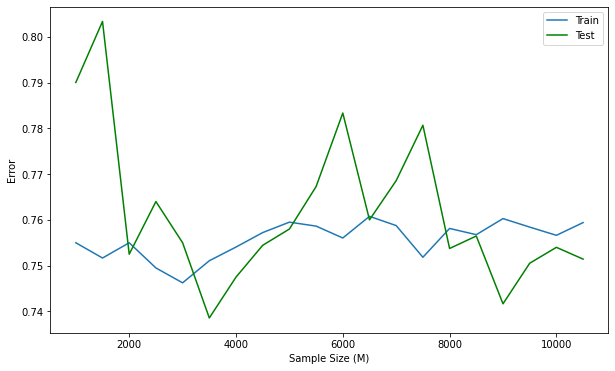

In [193]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(list(iters),train_errors)
plt.plot(list(iters),test_errors, color = "green")
plt.xlabel("Sample Size (M)")
plt.ylabel("Error")
plt.legend(["Train","Test"])

In [194]:
supVect.score(x_train,y_train)

0.24059523809523808

# Testing the SVM Classifier
After training, test the classifier on a small testing set. 
Gauge performance based on TP, TN, FP, FN statistics (i.e. precision, recall, accuracy, etc...)